In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [0]:
read_column="Open"

In [157]:
#READING SERIES
csv_data=pd.read_csv("/content/datasets_423609_1123544_HDFCBANK.csv",parse_dates=["Date"]).reset_index()
csv_data.rename(columns = {"index":"TimeStamp"},inplace = True)
csv_data.head()

,TimeStamp,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [0]:
#SPLITTING X AND Y FOR TRAIN,VAL,TEST
x_train_dataset=csv_data.loc[:,["TimeStamp"]][:4047].to_numpy().astype("float64")
y_train_dataset=csv_data.loc[:,["Open"]][:4047].to_numpy()
x_val_dataset=csv_data.loc[:,["TimeStamp"]][4048:5000].to_numpy().astype("float32")
y_val_dataset=csv_data.loc[:,["Open"]][4048:5000].to_numpy()
x_test_dataset=csv_data.loc[:,["TimeStamp"]][5000:].to_numpy().astype("float32")
y_test_dataset=csv_data.loc[:,["Open"]][5000:].to_numpy()

In [0]:
y_train_dataset.shape

In [0]:
#fitting the outputs between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
y_train_dataset = sc.fit_transform(y_train_dataset)
y_val_dataset = sc.fit_transform(y_val_dataset)
y_test_dataset = sc.fit_transform(y_test_dataset)

In [0]:
train_gen=keras.preprocessing.sequence.TimeseriesGenerator(y_train_dataset,y_train_dataset,10)
val_gen=keras.preprocessing.sequence.TimeseriesGenerator(y_val_dataset,y_val_dataset,10)
test_gen=keras.preprocessing.sequence.TimeseriesGenerator(y_test_dataset,y_test_dataset,10)

In [161]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="swish"),
  tf.keras.layers.Dense(100, activation="swish"),
  tf.keras.layers.LSTM(1000),
  tf.keras.layers.Dense(1250, activation="swish"),
  tf.keras.layers.Dense(1150, activation="swish"),
  tf.keras.layers.Dense(150, activation="swish"),
  tf.keras.layers.Dense(10,activation="swish"),
  tf.keras.layers.Dense(1,activation="swish"),
])

model.compile(loss="mae",
              optimizer="adam",
              metrics=["mae"])
model.fit(train_gen,validation_data=val_gen,epochs=10)
model.summary()

Epoch 1/10
32/32 [==============================] - 29s 899ms/step - loss: 0.1677 - mae: 0.1677 - val_loss: 0.3646 - val_mae: 0.3646
Epoch 2/10
32/32 [==============================] - 28s 879ms/step - loss: 0.1151 - mae: 0.1151 - val_loss: 0.1223 - val_mae: 0.1223
Epoch 3/10
32/32 [==============================] - 28s 888ms/step - loss: 0.0799 - mae: 0.0799 - val_loss: 0.0624 - val_mae: 0.0624
Epoch 4/10
32/32 [==============================] - 28s 879ms/step - loss: 0.0628 - mae: 0.0628 - val_loss: 0.1675 - val_mae: 0.1675
Epoch 5/10
32/32 [==============================] - 28s 882ms/step - loss: 0.1163 - mae: 0.1163 - val_loss: 0.1288 - val_mae: 0.1288
Epoch 6/10
32/32 [==============================] - 28s 880ms/step - loss: 0.0537 - mae: 0.0537 - val_loss: 0.0444 - val_mae: 0.0444
Epoch 7/10
32/32 [==============================] - 28s 880ms/step - loss: 0.0337 - mae: 0.0337 - val_loss: 0.0785 - val_mae: 0.0785
Epoch 8/10
32/32 [==============================] - 28s 882ms/step - 

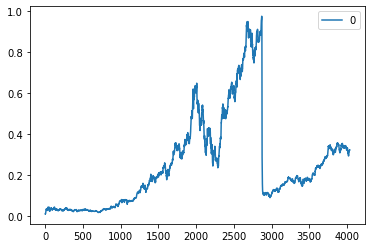

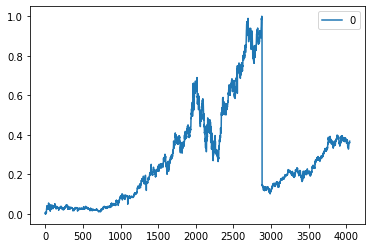

In [162]:
forecasted_data=model.predict_generator(train_gen)
predicted_data=pd.DataFrame(forecasted_data)
predicted_data.plot()
temp=pd.DataFrame(y_train_dataset)
temp.plot()

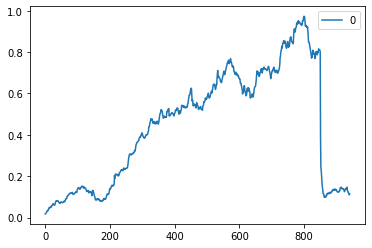

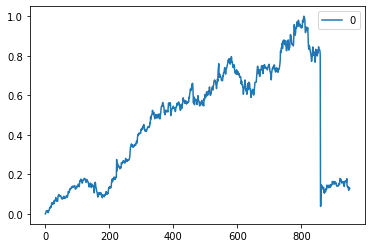

In [163]:
forecasted_data=model.predict_generator(val_gen)
predicted_data=pd.DataFrame(forecasted_data)
predicted_data.plot()
temp=pd.DataFrame(y_val_dataset)
temp.plot()

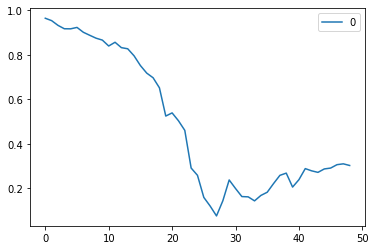

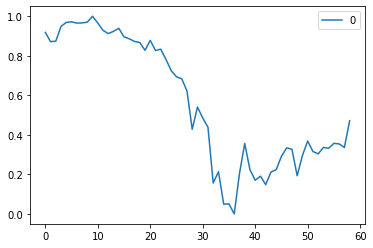

In [164]:
forecasted_data=model.predict_generator(test_gen)
predicted_data=pd.DataFrame(forecasted_data)
predicted_data.plot()
temp=pd.DataFrame(y_test_dataset)
temp.plot()